# MTBS Forest Fires exploratory data analysis

In this notebook we will define wildfire severity as the area burnt, and then look at data on rainfall, temperature, wind, land use, elevation, slope and aspect to try and build a dataframe to be used to predict wildfires.

Start by loading required modules and downloading data if necessary.

In [1]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from data_funcs import *

os.system(f'python data_download.py')
!python data_download.py

mtbs_perims_DD.shp is already downloaded in the subdirectory 'data'


Now we load in the data catalogue and shapefile containing the forest fire data and look at the structure of it.

In [5]:
data_catalogue = load_data_catalogue()


wildfire_shp = data_catalogue['files']['input']['wildfire_shp']
file = wildfire_shp['file_name']
location = wildfire_shp['location']
check_inputs(location, file)

# read in shapefile of fires
wildfire_df = gpd.read_file(os.path.join(location, file))
print(wildfire_df.shape)
count_nas(wildfire_df)

(30418, 23)


Event_ID          0
irwinID       25883
Incid_Name        0
Incid_Type        0
Map_ID            0
Map_Prog          0
Asmnt_Type        0
BurnBndAc         0
BurnBndLat        0
BurnBndLon        0
Ig_Date           0
Pre_ID         9153
Post_ID           0
Perim_ID      27551
dNBR_offst        0
dNBR_stdDv        0
NoData_T          0
IncGreen_T        0
Low_T             0
Mod_T             0
High_T            0
Comment       25695
geometry          0
dtype: int64

We now perform some basic cleaning i.e. calculating area of each fire, creating a state column, and removing managed fires.

In [3]:
wildfire_df = filter_df(wildfire_df, "Incid_Type", ["Wildfire", "Out of area response"])
wildfire_df = calc_area(wildfire_df)
wildfire_df = extract_state(wildfire_df)
wildfire_df.head()

# normalise cols

Filtering Incid_Type for values in ['Wildfire', 'Out of area response'] has dropped 14434 rows from the dataframe


c:\GitHub personal\forest-fires\data_funcs.py:151: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  gpd_df['area'] = gpd_df['geometry'].area


,Event_ID,irwinID,Incid_Name,Incid_Type,Map_ID,Map_Prog,Asmnt_Type,BurnBndAc,BurnBndLat,BurnBndLon,...,dNBR_stdDv,NoData_T,IncGreen_T,Low_T,Mod_T,High_T,Comment,geometry,area,state
0,AK6448214467319840607,NaN,GLACIER CREEK,Wildfire,4534,MTBS,Initial (SS),1897,64.482,-144.673,...,-9999,9999,9999,550,165,-20,NaN,"POLYGON ((-144.67866 64.49452, -144.67802 64.4...",0.001432,AK
1,SD4308410285019840906,NaN,SANDOZ,Wildfire,4535,MTBS,Initial,2691,43.084,-102.850,...,-9999,-970,-150,220,700,9999,NaN,"POLYGON ((-102.84037 43.07562, -102.84089 43.0...",0.001204,SD
2,MT4880411345819840819,NaN,NAPI PEAK,Wildfire,4536,MTBS,Extended,3680,48.804,-113.458,...,-9999,-970,-150,160,308,515,NaN,"POLYGON ((-113.48150 48.80303, -113.48122 48.8...",0.001823,MT
3,MT4533610695819840826,NaN,KIRBY,Wildfire,4537,MTBS,Extended,1597,45.336,-106.958,...,-9999,-970,-150,150,309,525,NaN,"POLYGON ((-106.93270 45.33398, -106.93237 45.3...",0.000742,MT
4,MT4561710632319840918,NaN,LAKE CREEK,Wildfire,4538,MTBS,Initial,3617,45.617,-106.323,...,-9999,-970,-150,-50,175,9999,NaN,"POLYGON ((-106.32656 45.63166, -106.32635 45.6...",0.001689,MT


Now we perform a few simple plots to look at the data

Text(0.5, 1.0, 'Plot of US Wildfires, 1984-2021')

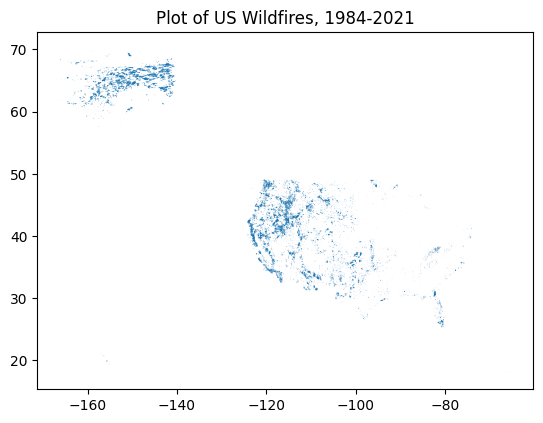

In [4]:
wildfire_df.plot()
plt.title('Plot of US Wildfires, 1984-2021')
